## Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import pylab as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
degrees_that_pay = pd.read_csv('data/degrees-that-pay-back.csv')

In [4]:
degrees_that_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


## Clean Up Data

Replace all strings representings salaires with integers. This enables us to perform analysis on the data. 

In [5]:
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace(',', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace('.', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace('$', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].astype(float)

degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].astype(float)

degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].astype(float)

## Data Prep
Calculate the rank of each undergraduate major for each percentile column and mid career salary and then use that to compute rank_sum. By taking the sum of all percentile ranks, we hope control for undergraduate majors that have extremely high salaries in a single percentile. We also introduce another new variable greatest_range that is the difference between the 90th percentile and the 10th percentile in hopes to account for the variability within the salaries.

In [6]:
degrees_that_pay['90th_Rank'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].rank(method='dense', ascending=True) 
degrees_that_pay['75th_Rank'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].rank(method='dense', ascending=True) 
degrees_that_pay['25th_Rank'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['10th_Rank'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['Mid_Career_Rank'] = degrees_that_pay['Mid-Career Median Salary'].rank(method='dense', ascending=True)
degrees_that_pay['Rank_Sum'] = degrees_that_pay['90th_Rank'] + degrees_that_pay['75th_Rank'] + degrees_that_pay['25th_Rank'] + degrees_that_pay['10th_Rank'] + degrees_that_pay['Mid_Career_Rank']
degrees_that_pay['Greatest_Range'] = degrees_that_pay['Mid-Career 90th Percentile Salary'] - degrees_that_pay['Mid-Career 10th Percentile Salary']

In [7]:
degrees_that_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,90th_Rank,75th_Rank,25th_Rank,10th_Rank,Mid_Career_Rank,Rank_Sum,Greatest_Range
0,Accounting,4600000.0,7710000.0,67.6,4220000.0,5610000.0,10800000.0,15200000.0,27.0,30.0,28.0,28.0,28.0,141.0,10980000.0
1,Aerospace Engineering,5770000.0,10100000.0,75.0,6430000.0,8210000.0,12700000.0,16100000.0,32.0,38.0,45.0,41.0,46.0,202.0,9670000.0
2,Agriculture,4260000.0,7190000.0,68.8,3630000.0,5210000.0,9630000.0,15000000.0,26.0,21.0,23.0,16.0,24.0,110.0,11370000.0
3,Anthropology,3680000.0,6150000.0,67.1,3380000.0,4550000.0,8930000.0,13800000.0,19.0,17.0,14.0,10.0,13.0,73.0,10420000.0
4,Architecture,4160000.0,7680000.0,84.6,5060000.0,6220000.0,9700000.0,13600000.0,18.0,23.0,35.0,35.0,27.0,138.0,8540000.0


## Model

We selected greatest range, mid career median salary, starting median salary, and rank sum as the columns to be used to compute our clusters. The range is used in order to capture the amount variability within the salaries for each major. In order to get a sense of what the salary is like for an average person, we also include mid career and starting median salaries. Finally we include the sum of all the ranks. We believe this variable will help account for any major that has its median salary affected by especially high or low salaries within a percentile. 

In [8]:
df = degrees_that_pay[["Greatest_Range", "Mid-Career Median Salary", "Starting Median Salary", "Rank_Sum"]]

After scaling the data we then create an plot using the elbow method. This method determins the optimal number of clusters to use by showing where the increase in clusters does not account for any more explination in the variance. 

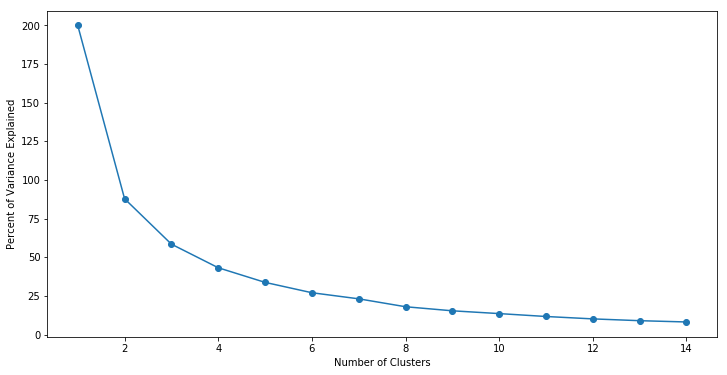

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.xlabel("Number of Clusters")
plt.ylabel("Percent of Variance Explained")
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Based on the plot we chose to use five clusters for our K means model. Due to the small size of the data set, a larger number of clusters may subdivde the Undergraduate majors into indiscernible clusters.

Next we create the KMeans model and fit it to our data. We then take cluster Ids and attach them back onto the original data set.

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)
y_kmeans = kmeans.predict(scaled_df)

degrees_that_pay["cluster_id"] = y_kmeans

The plot below visualizes the different clusters selected by the model and the center of each cluster.

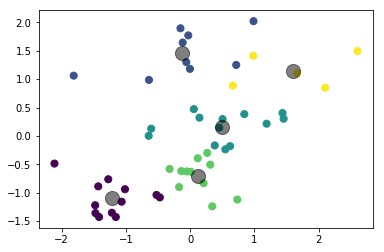

In [11]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Finally we split the original data set by cluster id

In [12]:
culster_groups = degrees_that_pay.groupby("cluster_id")
cluster_one = culster_groups.get_group(0)
cluster_two = culster_groups.get_group(1)
cluster_three = culster_groups.get_group(2)
cluster_four = culster_groups.get_group(3)
cluster_five = culster_groups.get_group(4)

## Results

### Cluster One 
The smallest cluster in terms of number of majors, this cluster contains degrees all related heavily to mathematics. It also contains the second highest average mid career salary.

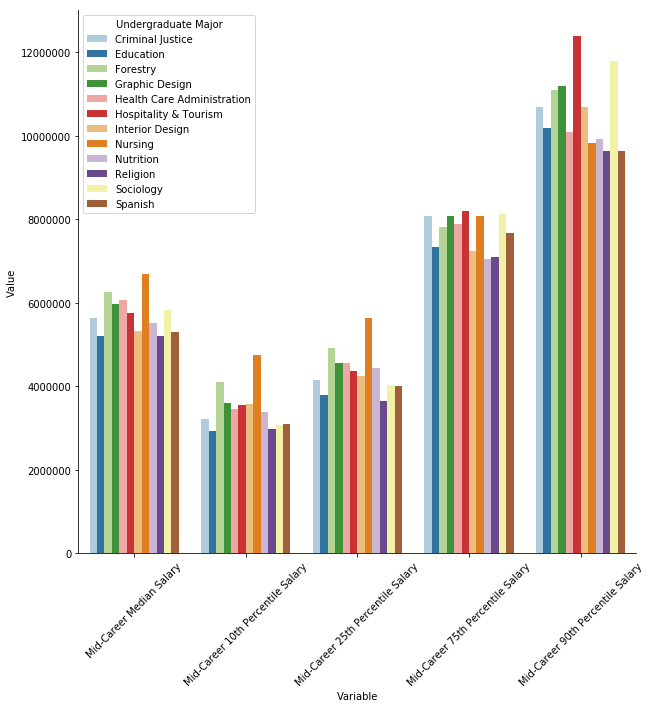

In [13]:
cluster_one = cluster_one[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_one.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig)

### Cluster Two

This cluster has a relatively low mid career median salary, but unlike the first these majors produce careers with a much smaller range between the percentiles. 

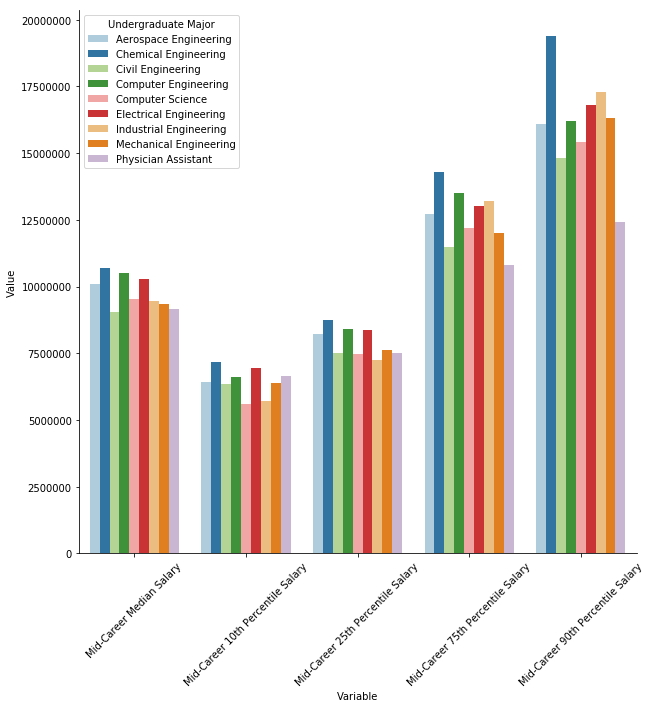

In [14]:
cluster_two = cluster_two[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_two.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig)

### Cluster Three

This cluster has good, but not great median salary and good room for growth. Containing majors such as Business Management, Accounting, IT, and Marketing, this cluster seems to be consistantly above average

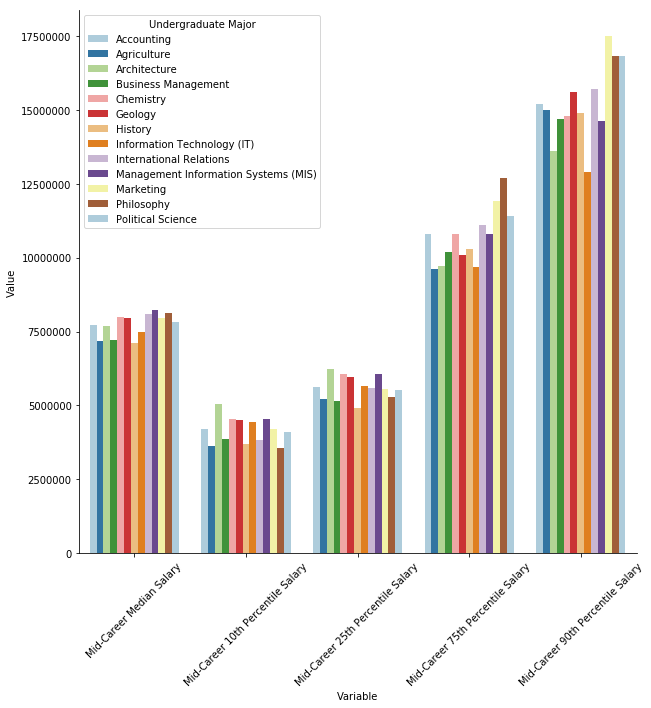

In [15]:
cluster_three = cluster_three[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_three.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig)

### Cluster Four

The easiest to categorize, this cluster contains all of the engineering majors with the addition of physician assitant and construction. This cluster has a relatively high median mid career salary with good room for growth.

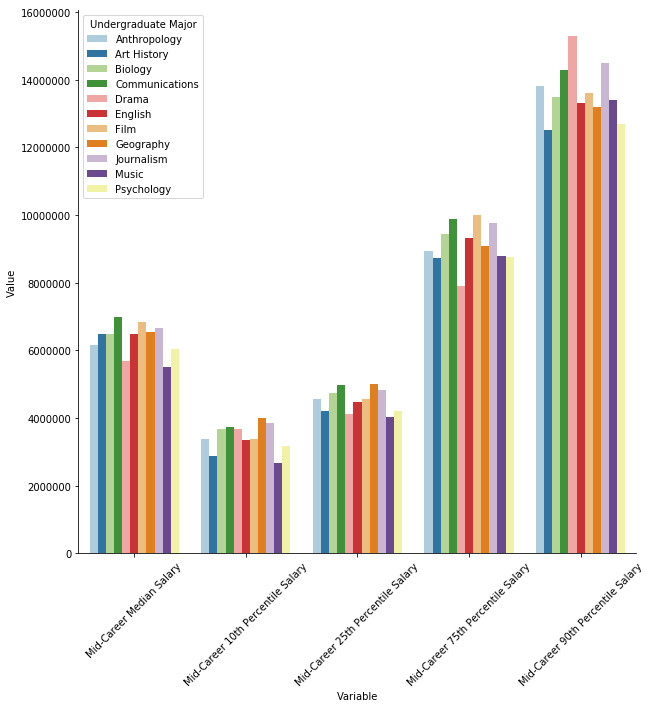

In [19]:
cluster_four = cluster_four[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_four.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig)

### Cluster Five

This cluster contains the largest range between the percentiles of all the clusters. Containing undergraduate majors like drama, music, film, and journalism, which can pay exceptionally well if you're successful, but overall pay less that other options.

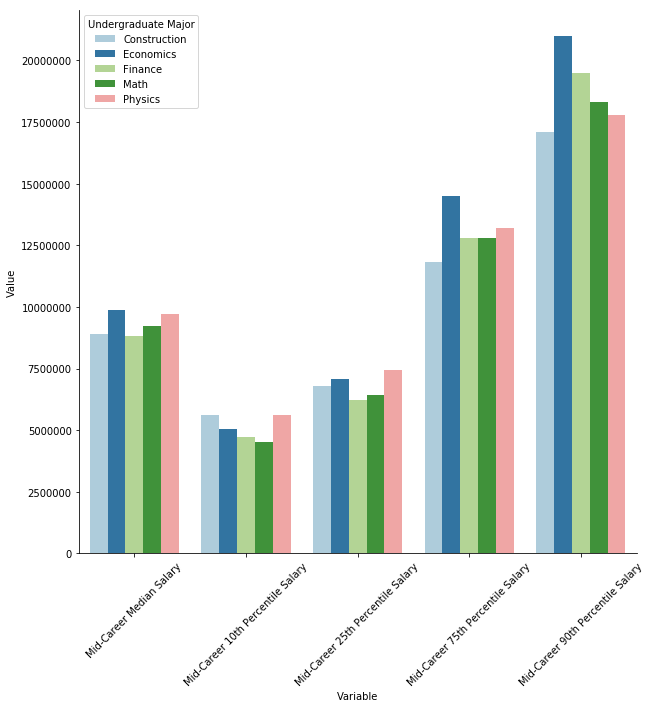

In [18]:
cluster_five = cluster_five[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_five.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig)

## Conclusion

We set out to discover how the choice in Undergraduate Major impacted salary throughout a person's career. Through our approach we created five clusters. From these clusters we can see several interestind details. Firstly, if you want a career with a high paying salary, a major that has its basis in math seems to the the way to go. This can be seen in cluster two, containing predomintely engineering majors, and cluster five with contains majors like Math, Physics, and Economics. Both of these cluster sport high mid career median salaries as well as some of the highest areas for growth. Other undergraduate majors can be more risky, such as Drama, Journalism, and Music. These majors and others like them in cluster four, have relatively low mid career salaries, but have a drastic amount of potential growth as there 90th percentile has some of the highest salaries. Based on these clusters, we do believe that Undergradate Major has an impact on salary.